# Regularização

Objetivo : evitar o overfiting - quando o modelo se ajusta muito bem ao modelo de dados observado mas se mostra ineficaz para prever dados.

Esta técnica reduz ou restringe as estimativas dos coeficientes para zero, reduzindo a possibilidade de uma aprendizagem de um modelo mais complexo ou felxível, evitando o overfiting.

O ajuste é feita por uma função de perda, conhecida como RSS ou soma residual dos quadrados.

Tipos:

Ridge Regression (norma L2)

<br>
<br>
$$Ridge : \lambda \sum_{i=1}^{n} \theta_i^2$$
<br>
<br>

Lasso Regression (norma L1)

<br>
<br>
$$Lasso : \lambda \sum_{i=1}^{n} |\theta_i| $$
<br>
<br>

# Usando o arquivo 'house_pricing_train.csv'

- Quais imóveis estão desvalorizados e merecem receber uma proposta?

Nesse problema, utilize 3 regressoes diferentes para treinarmos o conceito de regularização.

- MQO
- Ridge
- Lasso

Em ```house_pricing_test.csv``` escolha os 10 imóveis que devemos investir para obter o **maior lucro**.


In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./Data/house_pricing_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16603 entries, 0 to 16602
Data columns (total 16 columns):
price                       16603 non-null int64
num_bed                     16603 non-null int64
num_bath                    16603 non-null float64
size_house                  16603 non-null int64
size_lot                    16603 non-null int64
num_floors                  16603 non-null float64
is_waterfront               16603 non-null int64
condition                   16603 non-null int64
size_basement               16603 non-null int64
year_built                  16603 non-null int64
renovation_date             16603 non-null int64
zip                         16603 non-null int64
latitude                    16603 non-null float64
longitude                   16603 non-null float64
avg_size_neighbor_houses    16603 non-null int64
avg_size_neighbor_lot       16603 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.0 MB


In [8]:
df.describe().T['count']

price                       16603.0
num_bed                     16603.0
num_bath                    16603.0
size_house                  16603.0
size_lot                    16603.0
num_floors                  16603.0
is_waterfront               16603.0
condition                   16603.0
size_basement               16603.0
year_built                  16603.0
renovation_date             16603.0
zip                         16603.0
latitude                    16603.0
longitude                   16603.0
avg_size_neighbor_houses    16603.0
avg_size_neighbor_lot       16603.0
Name: count, dtype: float64

In [9]:
df.head()

price  num_bed  num_bath  size_house  size_lot  num_floors  is_waterfront  \
0  685000        4       2.5        2650     25248         1.0              0   
1  613000        3       1.5        1470      4480         1.0              0   
2  849000        4       1.5        2440      8040         1.0              0   
3  570000        3       2.0        1530      5401         1.0              0   
4  660000        3       2.5        2330      3995         2.0              0   

   condition  size_basement  year_built  renovation_date    zip   latitude  \
0          3            320        1954                0  98177  47.753690   
1          4            340        1918                0  98105  47.669310   
2          4           1000        1950                0  98177  47.708122   
3          4              0        1937                0  98115  47.685950   
4          3              0        2006                0  98029  47.554154   

    longitude  avg_size_neighbor_houses  avg_size_neighbor_lot  
0 -122.372754                      3020                  23135  
1 -122.291081                      2120                   4480  
2 -122.374050                      2140                   7920  
3 -122.303767                      1640                   5467  
4 -122.001275                      2330                   3740

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#importando as bibliotecas 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

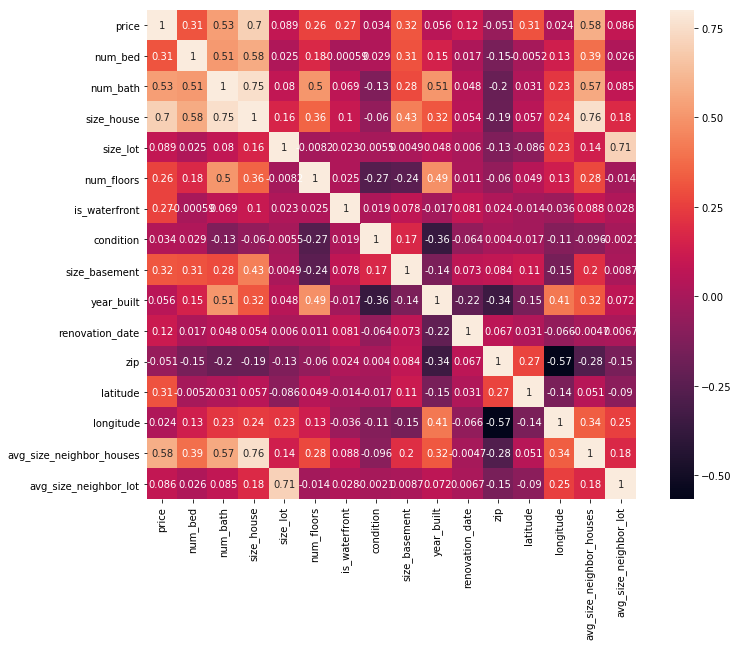

In [12]:
# matriz de correlação entre todas as variáveis numéricas.

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

In [13]:
# regressão com statsmodel para analisar o comportamento e peso das variáveis
import statsmodels.formula.api as smf

function1 = '''price ~ 
 + num_bed
 + num_bath
 + size_house
 + size_lot
 + num_floors
 + is_waterfront
 + condition
 + size_basement
 + year_built
 + renovation_date
 + zip
 + latitude
 + longitude
 + avg_size_neighbor_houses
 + avg_size_neighbor_lot'''

model1 = smf.ols(function1, df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2136.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        15:57:23   Log-Likelihood:            -2.2743e+05
No. Observations:               16603   AIC:                         4.549e+05
Df Residuals:                   16587   BIC:                         4.550e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [14]:
# uma forma minimamente mais analitica de escolher quais variáveis vamos passar log é olhando
# o terceiro (assimetria) e quarto (curtose) momentos estatisticos e comparar com os valores ideais
# de uma distribuição normal (0 e 3 respectivamente).

# Exemplo do calculo da assimetria:
from scipy import stats

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nAssimetria: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Assimetria: 



Skew
size_lot                  13.554537
is_waterfront             11.890370
avg_size_neighbor_lot      9.225448
renovation_date            4.605974
price                      4.028804
num_bed                    2.381004
size_basement              1.518016
size_house                 1.497697
avg_size_neighbor_houses   1.105619
condition                  1.013946
longitude                  0.851705
num_floors                 0.624759
num_bath                   0.539251
zip                        0.399703
year_built                -0.469250
latitude                  -0.492074

(array([1.382e+03, 4.065e+03, 5.129e+03, 2.658e+03, 9.230e+02, 5.040e+02,
        3.010e+02, 1.810e+02, 1.110e+02, 8.900e+01, 8.500e+01, 1.500e+02,
        9.900e+01, 9.300e+01, 9.000e+01, 5.400e+01, 5.600e+01, 4.800e+01,
        3.400e+01, 2.500e+01, 1.800e+01, 2.300e+01, 2.200e+01, 9.000e+00,
        1.500e+01, 1.200e+01, 1.000e+01, 1.500e+01, 8.000e+00, 1.400e+01,
        1.200e+01, 1.000e+01, 6.000e+00, 1.500e+01, 1.000e+01, 9.000e+00,
        9.000e+00, 7.000e+00, 5.000e+00, 1.100e+01, 1.000e+00, 2.000e+00,
        2.000e+00, 8.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        0.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 5.000e+00, 7.000e+00, 1.000e+01, 9.000e+00, 1.600e+01,
        2.500e+01, 9.000e+00, 1.200e+01, 3.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+0

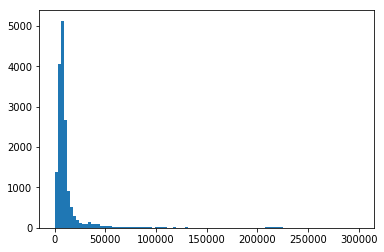

In [16]:
plt.hist(df.size_lot,bins=100, range=(0,300000))

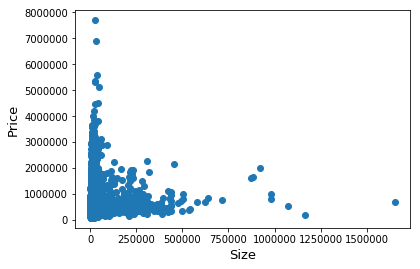

In [17]:
# vemos por exemplo que a variavel price (nosso target) é bastante assimétrica.
fig, ax = plt.subplots()
ax.scatter(x = df['size_lot'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

C:\Users\Marcos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 540721.66 and sigma = 368349.43



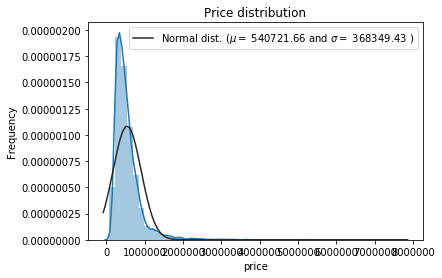

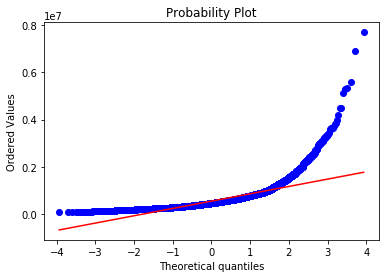

In [18]:
# comparando a distribuição real com uma normal teórica com mesma média e desvio.
sns.distplot(df['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [19]:
import numpy as np

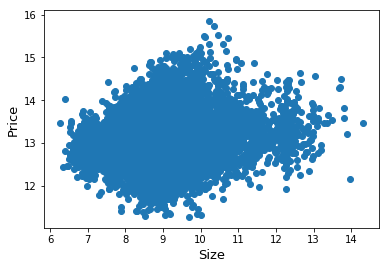


 mu = 13.05 and sigma = 0.53



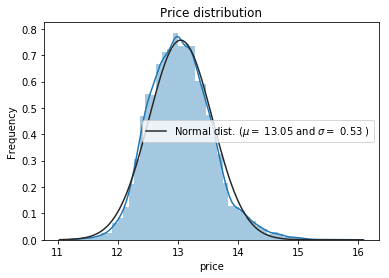

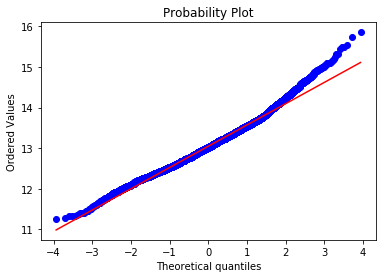

In [20]:
# passando uma simples transformação logaritmica para ver se a curva fica mais próxima
# da normal

fig, ax = plt.subplots()
ax.scatter(x = np.log(df['size_lot']), y = np.log(df['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()


sns.distplot(np.log(df['price']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(df['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(np.log(df['price']), plot=plt)
plt.show()

In [21]:
import statsmodels.formula.api as smf

function1 = ''' np.log(price) ~ 
 + num_bed
 + num_bath
 + size_house
 + size_lot
 + num_floors
 + is_waterfront
 + condition
 + size_basement
 + year_built
 + renovation_date
 + zip
 + latitude
 + longitude
 + avg_size_neighbor_houses
 + avg_size_neighbor_lot'''


model1 = smf.ols(function1, df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2902.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        16:05:33   Log-Likelihood:                -2239.3
No. Observations:               16603   AIC:                             4511.
Df Residuals:                   16587   BIC:                             4634.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Aqui alguns exemplos de feature engineering.

Não há um manual bem definido para essas operações, por isso conhecer bem como o algortimo
funciona ajuda-nos a escolher as melhores opções.

Juntar colunas que são muito parecidas e que tenham pouquíssimos dados pode ajudar o algoritmo a "entender mais facilmente". Mas se juntarmos duas colunas diferentes podemos atrapalha-lo. E se juntarmos uma coluna muito particular achando que ela deveria ser "juntada" com outra, podemos perder informacões bastante valiosas. 

Portanto a melhor estratégia é testar!

In [32]:
df['num_bath'].value_counts(dropna=False).nlargest(35)

2.50    4146
1.00    2960
1.75    2324
2.25    1592
2.00    1482
1.50    1104
2.75     904
3.00     582
3.50     563
3.25     459
3.75     121
4.00      99
4.50      74
4.25      57
0.75      52
4.75      16
5.00      14
5.25      12
5.50      10
0.00       6
6.00       6
1.25       5
0.50       3
5.75       3
6.25       2
8.00       2
6.50       2
7.50       1
6.75       1
7.75       1
Name: num_bath, dtype: int64

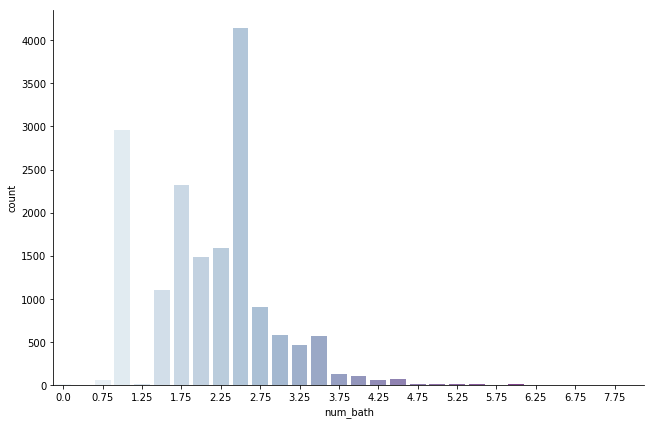

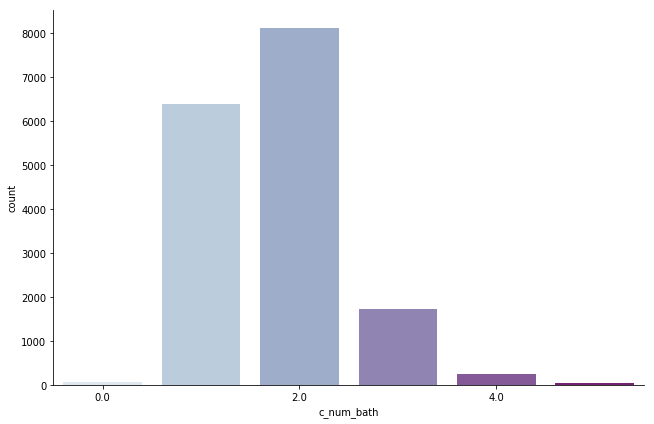

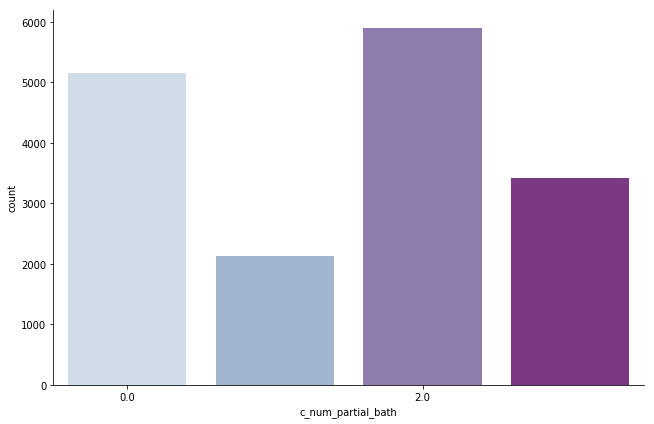

In [26]:
g = sns.factorplot(x="num_bath", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

df['c_num_bath'] = df.num_bath.replace({0:0, 0.50:0, 0.75:0,
                                          1:1, 1.25:1, 1.50:1, 1.75:1,
                                          2:2, 2.25:2, 2.50:2, 2.75:2,
                                          3:3, 3.25:3, 3.50:3, 3.75:3,
                                          4:4, 4.25:4, 4.50:4, 4.75:4,
                                          5:5, 5.25:5, 5.50:5, 5.75:5,
                                          6:5, 6.25:5, 6.50:5, 6.75:5,
                                          7:5, 7.25:5, 7.50:5, 7.75:5,
                                          8:5})

g = sns.factorplot(x="c_num_bath", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

df['c_num_partial_bath'] = df.num_bath.replace({0:0, 0.25:1, 0.50:2, 0.75:3,
                                                  1:0, 1.25:1, 1.50:2, 1.75:3,
                                                  2:0, 2.25:1, 2.50:2, 2.75:3,
                                                  3:0, 3.25:1, 3.50:2, 3.75:3,
                                                  4:0, 4.25:1, 4.50:2, 4.75:3,
                                                  5:0, 5.25:1, 5.50:2, 5.75:3,
                                                  6:0, 6.25:1, 6.50:2, 6.75:3,
                                                  7:0, 7.25:1, 7.50:2, 7.75:3,
                                                  8:0})

g = sns.factorplot(x="c_num_partial_bath", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=2)

In [23]:
avg_zip = df.groupby(df['zip'])[['price', 'size_house', 'size_lot']].median()

avg_zip.rename(columns={'price': 'zip_price',
                        'size_house': 'zip_size_house',
                        'size_lot':'zip_size_lot'}, inplace=True)

avg_zip = avg_zip.reset_index()
df = df.merge(avg_zip, left_on='zip', right_on='zip', how='inner')

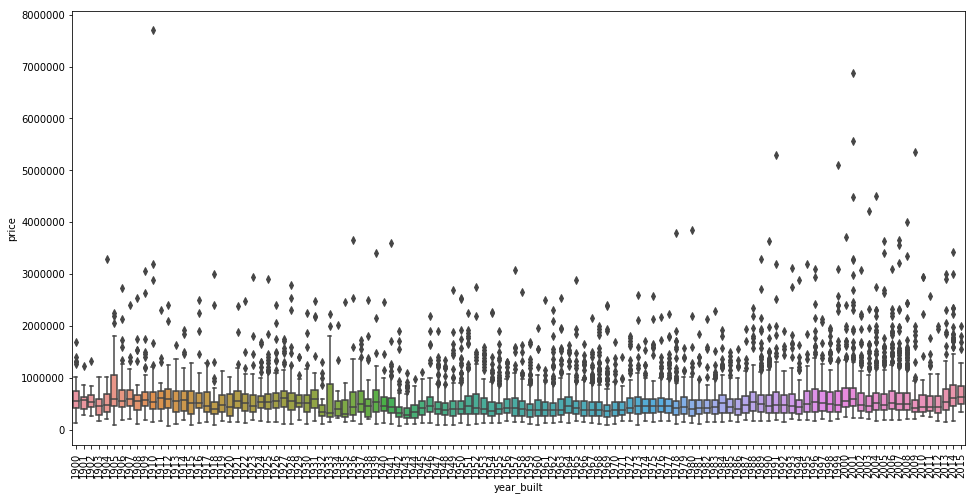

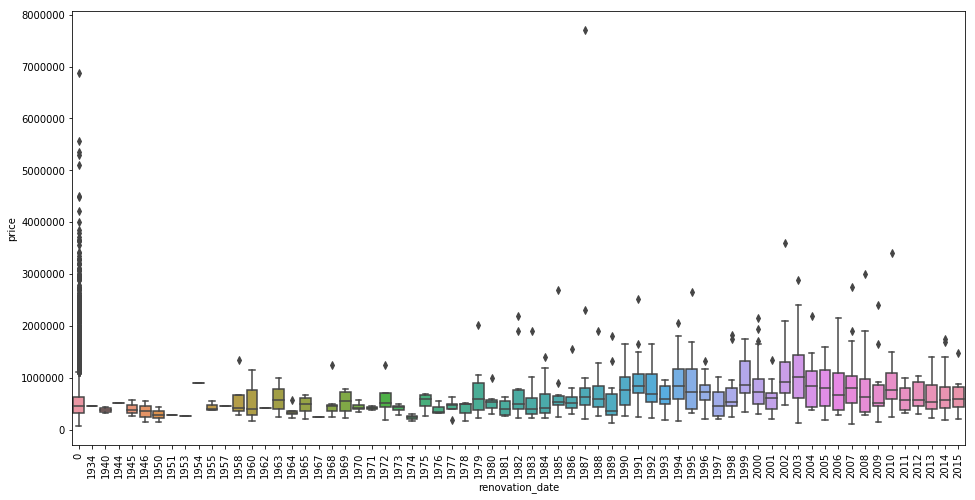

In [24]:
var = ['year_built','renovation_date']
for i in var:
    data = pd.concat([df['price'], df[i]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=i, y="price", data=data)
    plt.xticks(rotation=90)

In [35]:
data.head()


price  renovation_date
0  685000                0
1  849000                0
2  634000                0
3  350000                0
4  325000                0

In [36]:
#Função que cria variáveis dummies das colunas escolhidas.
categoricals = ['condition', 'num_floors', 'is_waterfront', 'c_num_bath', 'c_num_partial_bath', 'zip']

def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
    return df

df = one_hot(df,categoricals)

df = df.drop(categoricals, axis=1)

In [37]:
df.head()

price  num_bed  num_bath  size_house  size_lot  size_basement  year_built  \
0  685000        4      2.50        2650     25248            320        1954   
1  849000        4      1.50        2440      8040           1000        1950   
2  634000        3      1.75        2570     13000              0        1962   
3  350000        2      1.00        1430      8157            280        1944   
4  325000        2      1.00         750      5534              0        1947   

   renovation_date   latitude   longitude    ...      zip_98146  zip_98148  \
0                0  47.753690 -122.372754    ...              0          0   
1                0  47.708122 -122.374050    ...              0          0   
2                0  47.770455 -122.370889    ...              0          0   
3                0  47.725573 -122.361344    ...              0          0   
4                0  47.701706 -122.359622    ...              0          0   

   zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   zip_98198  zip_98199  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 102 columns]

In [38]:
# separando os dados em treino e teste
from sklearn.model_selection import train_test_split
def dfSplit(df,ratio,y='log_price'):
    train, test = train_test_split(df, test_size = ratio)
    y_train = train[y]
    y_test = test[y]
    x_train = train.ix[:, train.columns != y]
    x_test = test.ix[:, test.columns != y]
    return x_train, y_train, x_test, y_test

## A função abaixo expande o polinômio das colunas explicativas (os Xs) e serve para ela possa entender comportamentos não lineares. Se tivermos interações e polinômios sem necessidade, podemos causar overfiting - superajustar o modelo.

In [39]:
def tPoly(df, degree=1):
    polynomial = PolynomialFeatures(degree=degree)
    return polynomial.fit_transform(df)

In [40]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

### A função abaixo executará as seguintes ações:
- Rodando os modelos de machine learning,
- Aplicando polinômio,
- Separando os dados em treino e teste, 
- Exibindo as métricas e
- Plotando os resultados.

In [42]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def testRegs(df, clf, degree=1, ratio=.2, y='log_price', metrics=[]):

    x_train, y_train, x_test, y_test = dfSplit(df,ratio,y='log_price')

    poly_x_train = tPoly(x_train,degree)
    poly_x_test = tPoly(x_test,degree)

    clf.fit(poly_x_train,y_train)
    
    y_hat = clf.predict(poly_x_test)
    
    rmse = np.sqrt(-cross_val_score(clf, poly_x_train, y_train, scoring = scorer, cv = 10))
    
    print("RMSE:", rmse.mean())
    
    y_train_pred = clf.predict(poly_x_train)
    y_test_pred = clf.predict(poly_x_test)

    
    print('R2: %.2f, Score: %.2f, Parameters: %i' % (r2_score(y_test, y_hat), 
                                                     clf.score(poly_x_train,y_train), 
                                                     clf.coef_.shape[0]))
    
    print('R2: %.2f, Score: %.2f, Parameters: %i' % (r2_score(y_test, y_hat), 
                                                     clf.score(poly_x_train,y_train), 
                                                     clf.coef_.shape[0]))

    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
    plt.show()

    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

In [43]:
df['log_price'] = np.log(df['price'])

In [44]:
del df['price']

In [45]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

RMSE: 0.19473334034878367
R2: 0.86, Score: 0.87, Parameters: 102
R2: 0.86, Score: 0.87, Parameters: 102


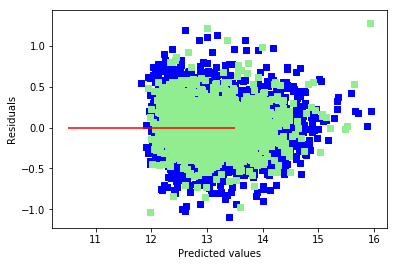

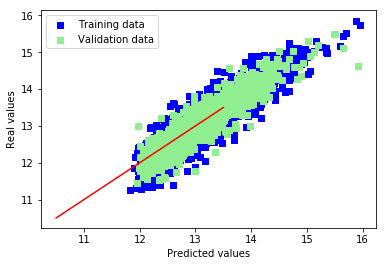

In [46]:
ols_simple = linear_model.LinearRegression()

testRegs(df,ols_simple,1)

In [47]:
def print_metrics(y_train, yhat_train,y_test, yhat_test):
    print('\n-----Dados de Treino-----')
    print('MSE - treino', mean_squared_error(y_train, yhat_train))
    print('R2 - treino', r2_score(y_train, yhat_train))

    print('\n-----Dados de Teste-----')
    print('MSE - test', mean_squared_error(y_test, yhat_test))
    print('R2 - test', r2_score(y_test, yhat_test))

In [48]:
def run_model_with_poly(dataframe, poly_n, modelo, target='log_price'):
        
    poly = PolynomialFeatures(degree=poly_n)

    X = df.drop([target], axis=1)
    
    newY = dataframe[target]
    
    df_temp = pd.DataFrame(poly.fit_transform(X))
    print('\ndf_temp shape', df_temp.shape)
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp,newY,test_size=0.2)

    print('\ntrain shape', X_train.shape)
    print('teste shape', X_test.shape)
    
    modelo.fit(X_train, y_train)

    yhat = modelo.predict(X_train)
    yhat_test = modelo.predict(X_test[list(X_train)])

    print_metrics(y_train, yhat, y_test, yhat_test)
    return modelo

In [49]:
%time run_model_with_poly(df, 2, ols_simple)


df_temp shape (16603, 5253)

train shape (13282, 5253)
teste shape (3321, 5253)

-----Dados de Treino-----
MSE - treino 0.02293389286948389
R2 - treino 0.916917226215067

-----Dados de Teste-----
MSE - test 0.9083366236585764
R2 - test -2.1833030384364465
Wall time: 1min 9s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
from sklearn.linear_model import Lasso

In [51]:
reg_lasso = Lasso(alpha=.65)

In [52]:
%time run_model_with_poly(df, 2, reg_lasso)


df_temp shape (16603, 5253)

train shape (13282, 5253)
teste shape (3321, 5253)

-----Dados de Treino-----
MSE - treino 0.03378102263853365
R2 - treino 0.8784462924032533

-----Dados de Teste-----
MSE - test 0.03694960774995262
R2 - test 0.8670166601932678
Wall time: 25.2 s


Lasso(alpha=0.65, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
ridge = linear_model.RidgeCV(alphas = [ 0.01, 0.1, 0.5, 0.75, 1])

%time run_model_with_poly(df, 2, ridge)


df_temp shape (16603, 5253)

train shape (13282, 5253)
teste shape (3321, 5253)

-----Dados de Treino-----
MSE - treino 3.3682869609148197e+22
R2 - treino -1.1996744242276135e+23

-----Dados de Teste-----
MSE - test 3.2465621896821536e+22
R2 - test -1.218902789418157e+23
Wall time: 1min 57s


RidgeCV(alphas=array([0.01, 0.1 , 0.5 , 0.75, 1.  ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [54]:
lasso = linear_model.LassoCV(alphas = [0.01, 0.06, 0.1, 0.3, 0.6, 1], max_iter = 1000, cv = 10)
%time run_model_with_poly(df, 2, lasso)


df_temp shape (16603, 5253)

train shape (13282, 5253)
teste shape (3321, 5253)

-----Dados de Treino-----
MSE - treino 0.031142391515108905
R2 - treino 0.8872080349676533

-----Dados de Teste-----
MSE - test 0.03820121238993466
R2 - test 0.8659898733396675
Wall time: 5min 31s


LassoCV(alphas=[0.01, 0.06, 0.1, 0.3, 0.6, 1], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)